## Customer Data Analysis - Retail
## analyse the dataset
## country, product, date, customer analysis
## product analysis - most and least expensive 

In [46]:
## import libraries
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize, to_rgba
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [3]:
## load the dataset and check the headings
retail_data= pd.read_csv('online_retail_2.csv')
retail_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
## check the data types and entry numbers
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [5]:
## do I need to drop missing items from 'Description' ?
## check back again after dropping missing Customer ID entries

In [6]:
## drop missing Customer ID entries and convert them to integer
retail_data = retail_data[retail_data['Customer ID'].notna()]
retail_data['Customer ID'] = retail_data['Customer ID'].astype(np.int64)

In [7]:
## convert data type of Invoice Date from object type to datetime type
retail_data['InvoiceDate_date']= pd.to_datetime(retail_data['InvoiceDate'])


In [8]:
## sort values acc to new InvoiceDate_date column
retail_data= retail_data.sort_values('InvoiceDate_date')

In [9]:
## even tough there are price and quantity info, we need the total sale value therefore calculate
retail_data['Total_value']= retail_data['Quantity']*retail_data['Price'] 

In [10]:
## check the changes
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 1067370
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Invoice           824364 non-null  object        
 1   StockCode         824364 non-null  object        
 2   Description       824364 non-null  object        
 3   Quantity          824364 non-null  int64         
 4   InvoiceDate       824364 non-null  object        
 5   Price             824364 non-null  float64       
 6   Customer ID       824364 non-null  int64         
 7   Country           824364 non-null  object        
 8   InvoiceDate_date  824364 non-null  datetime64[ns]
 9   Total_value       824364 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 69.2+ MB


In [11]:
## top 10 customers and bottom 10 customers
retail_data_customers= retail_data.groupby(['Customer ID', 'Country'], as_index= False)['Total_value'].agg('sum')
retail_data_customers_high= retail_data_customers.sort_values('Total_value').head(10)
retail_data_customers_low= retail_data_customers.sort_values('Total_value', ascending= False).head(10)

In [12]:
retail_data.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_date,Total_value
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009-12-01 07:45:00,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01 07:45:00,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01 07:45:00,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009-12-01 07:45:00,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009-12-01 07:45:00,30.0


In [13]:
retail_data.tail(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_date,Total_value
1067357,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680,France,2011-12-09 12:50:00,19.80
1067356,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680,France,2011-12-09 12:50:00,19.80
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,2011-12-09 12:50:00,14.85
1067361,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680,France,2011-12-09 12:50:00,15.00
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680,France,2011-12-09 12:50:00,18.00


In [14]:
## add the total_values for each country - highest and lowest 
retail_data_country= retail_data.groupby(['Country'],as_index=False)['Total_value'].agg(sum)
retail_data_country_ascending= retail_data_country.sort_values('Total_value').head(10)
retail_data_country_descending= retail_data_country.sort_values('Total_value', ascending= False).head(10)

In [15]:
retail_data_country.head(5)

,Country,Total_value
0,Australia,167129.07
1,Austria,23177.60
2,Bahrain,1354.37
3,Belgium,63574.49
4,Brazil,1411.87


In [16]:
retail_data_country_ascending.head(5)

,Country,Total_value
30,Saudi Arabia,131.17
25,Nigeria,140.39
40,West Indies,536.41
8,Czech Republic,707.72
20,Korea,949.82


In [17]:
retail_data_country_descending.head(5)

,Country,Total_value
38,United Kingdom,1.380642e+07
10,EIRE,5.785016e+05
24,Netherlands,5.485249e+05
14,Germany,4.179886e+05
13,France,3.265047e+05


In [18]:
## plot highest total values against each country

fig_country_vs_value= go.Figure(data=[go.Bar(name= 'Countries with Highest Total Purchase Value', x=retail_data_country_descending['Country'].astype(str), y=retail_data_country_descending['Total_value'], marker_opacity=1, marker={'color': retail_data_country_descending['Total_value'], 'colorscale': 'Rainbow'})])

fig_country_vs_value.update_traces(texttemplate= '£%{y:3s}', textposition= 'outside')
fig_country_vs_value.update_layout(title= 'Countries with Highest Total Purchase Value', title_x= 0.45, xaxis_title= 'Countries', yaxis_title= 'Total Purchase Values', plot_bgcolor= 'white')
fig_country_vs_value.show()

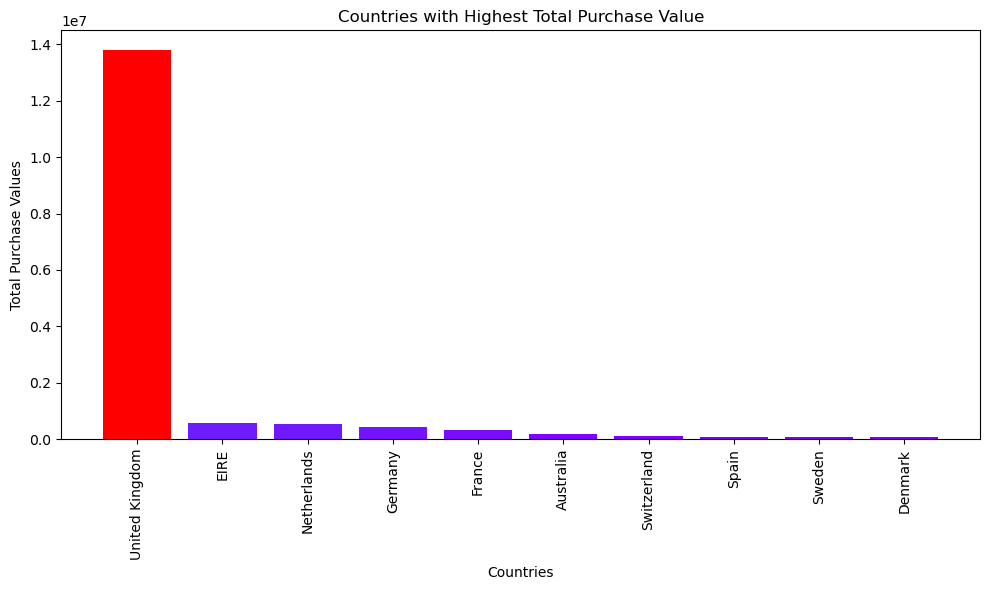

In [51]:
## use matplotlib
x_data_country_desc= retail_data_country_descending['Country'].astype(str)
y_data_country_desc= retail_data_country_descending['Total_value']

norm_country= Normalize(vmin=min(y_data_country_desc), vmax=max(y_data_country_desc))
colors_country_desc=[to_rgba(plt.cm.rainbow(norm_country(val))) for val in y_data_country_desc]

plt.figure(figsize=(10,6))
plt.bar(x_data_country_desc, y_data_country_desc, alpha=1, linewidth=0, color= colors_country_desc, edgecolor='black')

plt.xlabel('Countries')
plt.ylabel('Total Purchase Values')
plt.title('Countries with Highest Total Purchase Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [19]:
## what about min total spending, plot lowest total spending against each country

fig_country_vs_value1= go.Figure(data=[go.Bar(name= 'Countries with Lowest Total Purchase Value', x=retail_data_country_ascending['Country'].astype(str), y=retail_data_country_ascending['Total_value'], marker_opacity=1, marker={'color': retail_data_country_ascending['Total_value'], 'colorscale': 'Rainbow'})])

fig_country_vs_value1.update_traces(texttemplate= '£%{y:3s}', textposition= 'outside')
fig_country_vs_value1.update_layout(title= 'Countries with Lowest Total Purchase Value', title_x= 0.45, xaxis_title= 'Countries', yaxis_title= 'Total Purchase Values', plot_bgcolor= 'white')
fig_country_vs_value1.show()

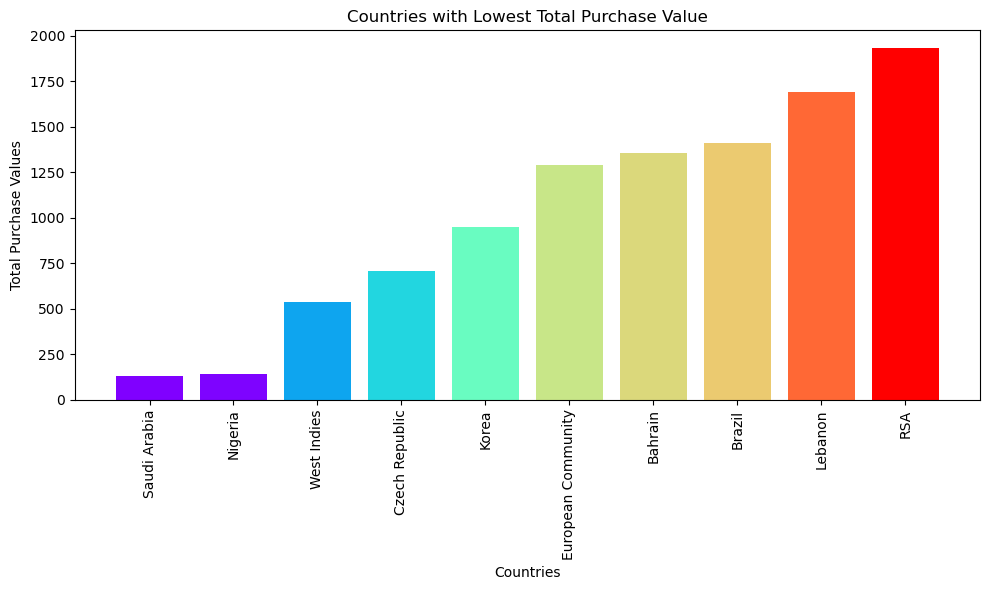

In [50]:
## use matplotlib
x_data_country_asc= retail_data_country_ascending['Country'].astype(str)
y_data_country_asc= retail_data_country_ascending['Total_value']

norm_country= Normalize(vmin=min(y_data_country_asc), vmax=max(y_data_country_asc))
colors_country_asc=[to_rgba(plt.cm.rainbow(norm_country(val))) for val in y_data_country_asc]

plt.figure(figsize=(10,6))
plt.bar(x_data_country_asc, y_data_country_asc, alpha=1, linewidth=0, color= colors_country_asc, edgecolor='black')

plt.xlabel('Countries')
plt.ylabel('Total Purchase Values')
plt.title('Countries with Lowest Total Purchase Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [20]:
## What are the most and least expensive products?
retail_data_most_exp= retail_data.loc[retail_data['Price']==retail_data['Price'].max()]
retail_data_most_exp=retail_data_most_exp.groupby(['Description', 'Price'], as_index=False)['Quantity'].agg('sum')

retail_data_least_exp= retail_data.loc[retail_data['Price']==retail_data['Price'].min()]
retail_data_least_exp=retail_data_least_exp.groupby(['Description', 'Price'], as_index=False)['Quantity'].agg('sum')

In [21]:
retail_data_most_exp

,Description,Price,Quantity
0,Manual,38970.0,-1


## The most expensive item's quantity cannot be -1.  This is either typed in by mistake or it is a return item - needs more investigating


In [22]:
retail_data_least_exp

,Description,Price,Quantity
0,FLAMINGO LIGHTS,0.0,24
1,OVAL WALL MIRROR DIAMANTE,0.0,1
2,36 FOIL STAR CAKE CASES,0.0,144
3,6 RIBBONS EMPIRE,0.0,12
4,ADVENT CALENDAR GINGHAM SACK,0.0,4
...,...,...,...
56,SET/5 RED SPOTTY LID GLASS BOWLS,0.0,2
57,TV DINNER TRAY DOLLY GIRL,0.0,9
58,This is a test product.,0.0,10
59,VINTAGE CREAM CAT FOOD CONTAINER,0.0,1


In [25]:
## there are 61 items with '0' price even though there are quantities.  Why not priced?
## ignore zero priced products and check again

retail_data_priced= retail_data.loc[retail_data['Price']!= 0]
retail_data_least_exp_nonzero= retail_data_priced.loc[retail_data_priced['Price']==retail_data_priced['Price'].min()]
retail_data_least_exp_nonzero= retail_data_least_exp_nonzero.groupby(['Description', 'Price'], as_index=False)['Quantity'].agg('sum')
retail_data_least_exp_nonzero

,Description,Price,Quantity
0,Bank Charges,0.001,1
1,PADS TO MATCH ALL CUSHIONS,0.001,17


In [53]:
## what are the top 10 bestselling products?
retail_data_products= retail_data.groupby(['Description'], as_index=False)['Quantity'].agg(sum)
retail_data_products_desc= retail_data_products.sort_values('Quantity', ascending=False).head(10)
retail_data_products_desc.head(10)


,Description,Quantity
5183,WORLD WAR 2 GLIDERS ASSTD DESIGNS,107489
5061,WHITE HANGING HEART T-LIGHT HOLDER,90008
292,ASSORTED COLOUR BIRD ORNAMENT,79434
2397,JUMBO BAG RED RETROSPOT,74564
753,BROCADE RING PURSE,70390
3072,PACK OF 60 PINK PAISLEY CAKE CASES,55051
157,60 TEATIME FAIRY CAKE CASES,53169
3075,PACK OF 72 RETROSPOT CAKE CASES,45742
3074,PACK OF 72 RETRO SPOT CAKE CASES,44507
4517,SMALL POPCORN HOLDER,43602


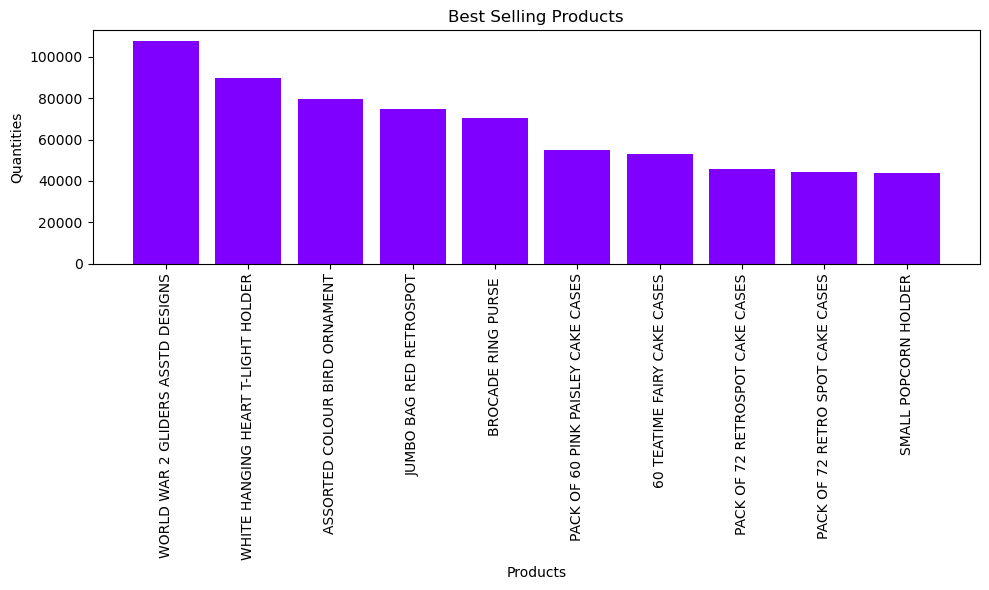

In [54]:
## plot the top 10 best selling products
x_data_product_desc= retail_data_products_desc['Description'].astype(str)
y_data_product_desc= retail_data_products_desc['Quantity']

norm_product= Normalize(vmin=min(y_data_product_desc), vmax=max(y_data_product_desc))
colors_product_desc=[to_rgba(plt.cm.rainbow(norm_country(val))) for val in y_data_product_desc]

plt.figure(figsize=(10,6))
plt.bar(x_data_product_desc, y_data_product_desc, alpha=1, linewidth=0, color= colors_product_desc, edgecolor='black')

plt.xlabel('Products')
plt.ylabel('Quantities')
plt.title('Best Selling Products')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [55]:
## use plotly for best selling products
fig_products= go.Figure(data=[go.Bar(name= 'Best Selling Products', x=retail_data_products_desc['Description'].astype(str), y=retail_data_products_desc['Quantity'], marker_opacity=1, marker={'color': retail_data_products_desc['Quantity'], 'colorscale': 'Rainbow'})])

fig_products.update_traces(texttemplate= '£%{y:3s}', textposition= 'outside')
fig_products.update_layout(title= 'Best Selling Products', title_x= 0.45, xaxis_title= 'Description', yaxis_title= 'Quantity', plot_bgcolor= 'white')
fig_products.show()

In [26]:
## which customer have the highest and lowest spending?

retail_data_customers= retail_data_customers.groupby(['Customer ID', 'Country'],as_index=False)['Total_value'].agg(sum)
retail_data_customers_ascending= retail_data_customers.sort_values('Total_value').head(10)
retail_data_customers_descending= retail_data_customers.sort_values('Total_value', ascending= False).head(10)


In [31]:
retail_data_customers_ascending.head(10)

,Customer ID,Country,Total_value
5066,17399,United Kingdom,-25111.09
585,12918,United Kingdom,-10953.50
3516,15849,United Kingdom,-5876.34
3427,15760,Norway,-5795.87
4648,16981,United Kingdom,-4620.86
3818,16151,United Kingdom,-4217.59
1730,14063,United Kingdom,-3767.20
5690,18023,United Kingdom,-3248.86
4680,17013,United Kingdom,-3224.76
2869,15202,United Kingdom,-2570.18


## why all negatives? Are they possibly product returns/credit notes?

In [30]:
retail_data_customers_descending.head(10)

,Customer ID,Country,Total_value
5769,18102,United Kingdom,598215.22
2313,14646,Netherlands,523342.07
1823,14156,EIRE,296564.69
2578,14911,EIRE,270248.53
5117,17450,United Kingdom,233579.39
1361,13694,United Kingdom,190825.52
5178,17511,United Kingdom,171885.98
72,12415,Australia,143269.29
4351,16684,United Kingdom,141502.25
2728,15061,United Kingdom,136391.48


## Out of £13.8m UK spending, the top customer is from UK and spent £600k 

In [35]:
fig_customers_vs_value= go.Figure(data=[go.Bar(name= 'Customers with Highest Total Purchase Values', x=retail_data_customers_descending['Customer ID'].astype(str), y=retail_data_customers_descending['Total_value'], marker_opacity=1, marker={'color': retail_data_customers_descending['Total_value'], 'colorscale': 'Rainbow'})])

fig_customers_vs_value.update_traces(texttemplate= '£%{y:3s}', textposition= 'outside')
fig_customers_vs_value.update_layout(title= 'Customers with Highest Total Purchase Value', title_x= 0.45, xaxis_title= 'Customers', yaxis_title= 'Total Purchase Values', plot_bgcolor= 'white')
fig_customers_vs_value.show()

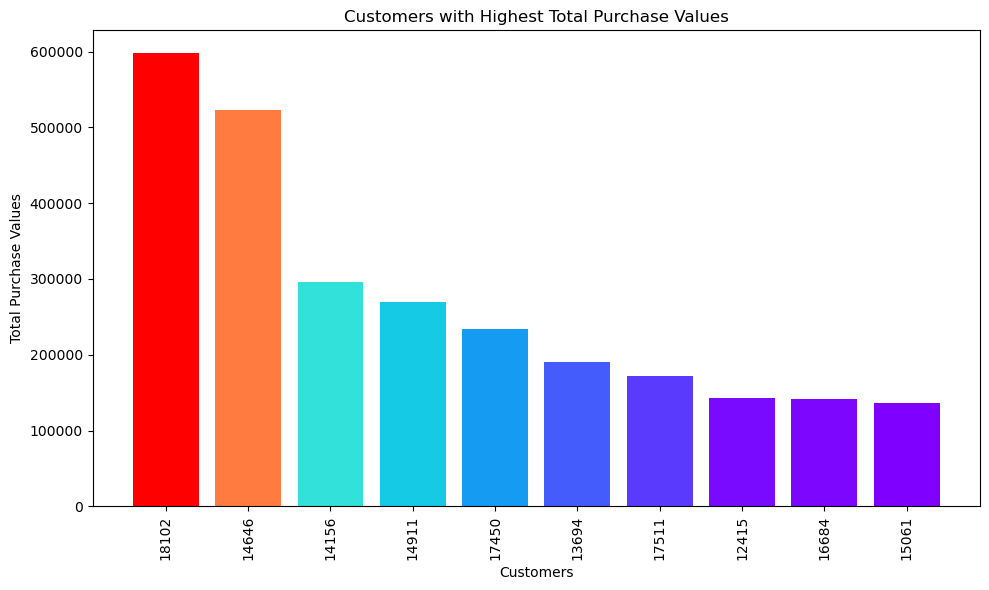

In [48]:
## use matplotlib
x_data= retail_data_customers_descending['Customer ID'].astype(str)
y_data= retail_data_customers_descending['Total_value']

norm_data= Normalize(vmin=min(y_data), vmax=max(y_data))
colors=[to_rgba(plt.cm.rainbow(norm_data(val))) for val in y_data]

plt.figure(figsize=(10,6))
plt.bar(x_data, y_data, alpha=1, linewidth=0, color= colors, edgecolor='black')

plt.xlabel('Customers')
plt.ylabel('Total Purchase Values')
plt.title('Customers with Highest Total Purchase Values')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [33]:
fig_customers_vs_value2= go.Figure(data=[go.Bar(name= 'Customers with Lowest Total Purchase Values', x=retail_data_customers_ascending['Customer ID'].astype(str), y=retail_data_customers_ascending['Total_value'], marker_opacity=1, marker={'color': retail_data_customers_ascending['Total_value'], 'colorscale': 'Rainbow'})])

fig_customers_vs_value2.update_traces(texttemplate= '£%{y:3s}', textposition= 'outside')
fig_customers_vs_value2.update_layout(title= 'Customers with Lowest Total Purchase Value', title_x= 0.45, xaxis_title= 'Customers', yaxis_title= 'Total Purchase Values', plot_bgcolor= 'white')
fig_customers_vs_value2.show()

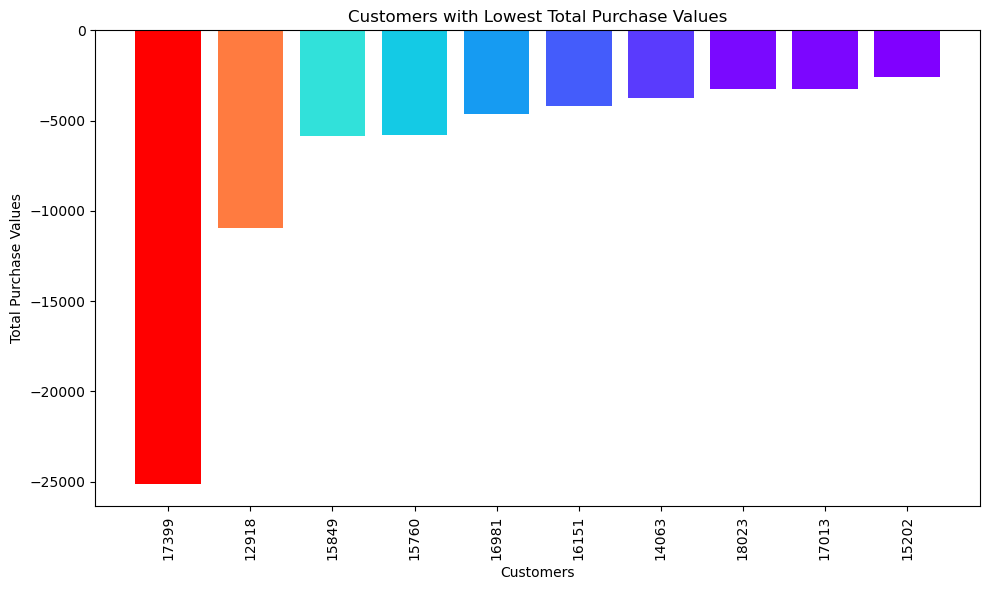

In [49]:
## use matplotlib for the same plotly chart data
x_data_cust_asc= retail_data_customers_ascending['Customer ID'].astype(str)
y_data_cust_asc= retail_data_customers_ascending['Total_value']

norm_data_asc= Normalize(vmin=min(y_data), vmax=max(y_data))
colors=[to_rgba(plt.cm.rainbow(norm_data_asc(val))) for val in y_data]

plt.figure(figsize=(10,6))
plt.bar(x_data_cust_asc, y_data_cust_asc, alpha=1, linewidth=0, color= colors, edgecolor='black')

plt.xlabel('Customers')
plt.ylabel('Total Purchase Values')
plt.title('Customers with Lowest Total Purchase Values')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()